In [1]:
import seaborn
import numpy, scipy, IPython.display as ipd, matplotlib.pyplot as plt
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

In [2]:
# upload the wav file
filename = 'rooster_competition.wav'
x, sr = librosa.load(filename)

In [3]:
# uploading audio
ipd.Audio(x, rate=sr)

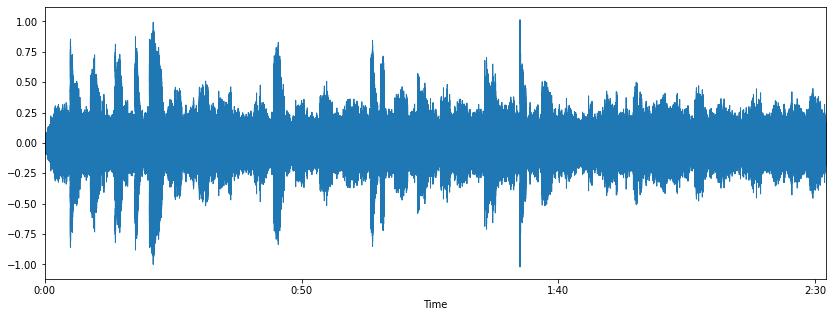

In [4]:
# visualise the audio signal with default sampling rate at 22050
librosa.display.waveplot(x, sr=sr)
bins_per_octave = 36
cqt = librosa.cqt(x**2, sr=sr, n_bins=300, bins_per_octave=bins_per_octave)
# convert amplitude at db
log_cqt = librosa.amplitude_to_db(numpy.abs(cqt))

In [5]:
cqt.shape

(300, 6553)

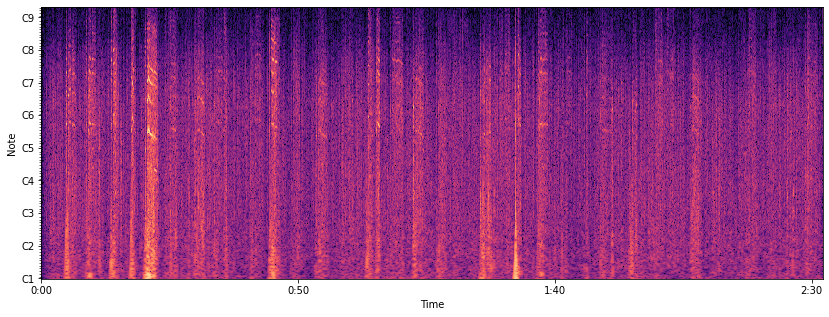

In [8]:
#visualize the specshow of frequencies
librosa.display.specshow(log_cqt, sr=sr, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=bins_per_octave)

In [9]:
# visualise the  highest peaks
hop_length = 200
onset_env = librosa.onset.onset_strength(x**2, sr=sr, hop_length=hop_length)

(0.0, 16774.0)

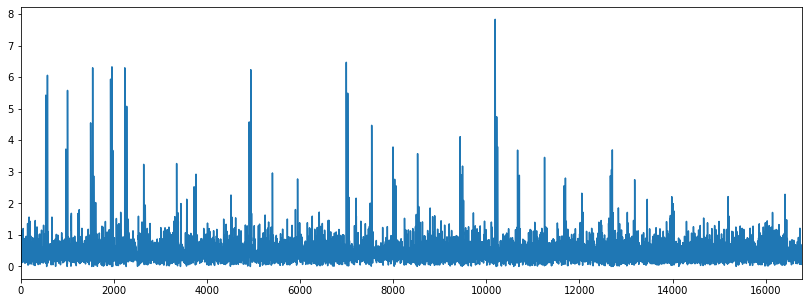

In [10]:
#plot the peaks
plt.plot(onset_env)
plt.xlim(0, len(onset_env))

In [70]:
# Filter the unwanted peaks by changing the parameters speacially delta value
onset_samples = librosa.onset.onset_detect(x,
                                           sr=sr, units='samples', 
                                           hop_length=hop_length, 
                                           backtrack=False,
                                           pre_max=40,
                                           post_max=40,
                                           pre_avg=200,
                                           post_avg=200,
                                           delta=0.25,
                                           wait=1)
onset_samples

array([ 108400,  201800,  300800,  309800,  320600,  392400,  447800,
        528800,  670200,  753400,  982000, 1003400, 1189600, 1399000,
       1507800, 1599600, 1705000, 1887800, 2038400, 2134400, 2250200])

In [71]:
onset_boundaries = numpy.concatenate([[0], onset_samples, [len(x)]])

In [72]:
onset_boundaries

array([      0,  108400,  201800,  300800,  309800,  320600,  392400,
        447800,  528800,  670200,  753400,  982000, 1003400, 1189600,
       1399000, 1507800, 1599600, 1705000, 1887800, 2038400, 2134400,
       2250200, 3354625])

In [73]:
onset_times = librosa.samples_to_time(onset_boundaries, sr=sr)

In [74]:
onset_times

array([  0.        ,   4.91609977,   9.15192744,  13.64172336,
        14.04988662,  14.53968254,  17.79591837,  20.30839002,
        23.98185941,  30.39455782,  34.16780045,  44.53514739,
        45.50566893,  53.95011338,  63.44671202,  68.38095238,
        72.54421769,  77.32426304,  85.61451247,  92.44444444,
        96.79818594, 102.04988662, 152.13718821])

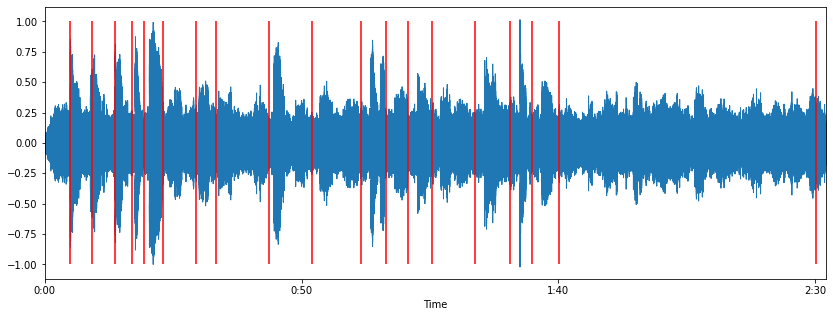

In [75]:
# find the differences between the peaks time and eleminate the very closest peaks and also plot the result 
# on the original signal

difference = numpy.diff(onset_times)
test = difference[~(difference < 2)]
onset_times = list()
value = 0.0
for i in test:
    value = value + i
    onset_times.append(value)
librosa.display.waveplot(x, sr=sr)
plt.vlines(onset_times, -1, 1, color='r')


In [67]:
# atleast 1 second delay between the rooster crows
crow_duration = numpy.diff(onset_times) - 1
# create dictionary with the crows durations 
name = range(len(crow_duration))
name_duration = dict(zip(name, crow_duration))

In [68]:
New_name_duration = dict()
for key, value in name_duration.items():
   if value < 7.0:
       New_name_duration[key] = round (value,4)
New_name_duration

{0: 3.2358,
 1: 3.4898,
 2: 2.2562,
 3: 1.5125,
 4: 1.0862,
 5: 5.4127,
 6: 2.7732,
 8: 2.5556,
 9: 3.8889,
 11: 2.0385,
 12: 3.1633,
 13: 3.78,
 15: 5.8299,
 16: 3.3537,
 17: 4.2517,
 18: 3.0635}

In [69]:
# sorting roosters with their crows duration
New_name_duration = sorted(New_name_duration.items(), key=lambda x: x[1], reverse=True)
New_name_duration

[(15, 5.8299),
 (5, 5.4127),
 (17, 4.2517),
 (9, 3.8889),
 (13, 3.78),
 (1, 3.4898),
 (16, 3.3537),
 (0, 3.2358),
 (12, 3.1633),
 (18, 3.0635),
 (6, 2.7732),
 (8, 2.5556),
 (2, 2.2562),
 (11, 2.0385),
 (3, 1.5125),
 (4, 1.0862)]